In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
matches_df = pd.read_csv("~/storage/data/physicists/forks-of-cmssw-2022-03-04/GitHub-CMSSW-user-nonfork-dependencies-2022-03-04.csv", parse_dates=["created", "updated"])
matches_df

,owner,repo,created,updated,filename,suffix,package,how
0,helee,helee/HN_Plotter,2020-03-11 08:11:46,2020-07-15 18:07:49,helee-HN_Plotter/makePlots_muon_eachYear.C,C,iostream,cpp_include_bracket
1,helee,helee/HN_Plotter,2020-03-11 08:11:46,2020-07-15 18:07:49,helee-HN_Plotter/makePlots_TT_eachYear.C,C,iostream,cpp_include_bracket
2,helee,helee/HN_Plotter,2020-03-11 08:11:46,2020-07-15 18:07:49,helee-HN_Plotter/makePlots_DY_eachYear.C,C,iostream,cpp_include_bracket
3,helee,helee/HN_Plotter,2020-03-11 08:11:46,2020-07-15 18:07:49,helee-HN_Plotter/makePlots_electron_eachYear.C,C,iostream,cpp_include_bracket
4,helee,helee/TnP_analysis,2018-10-23 06:25:20,2018-10-23 06:32:47,helee-TnP_analysis/treeAnalysis.C,C,TH2.h,cpp_include_bracket
...,...,...,...,...,...,...,...,...
5224784,hkaushalya,hkaushalya/haddws,2014-01-21 23:24:01,2021-09-09 13:34:32,hkaushalya-haddws/haddws.C,C,TH1.h,cpp_include_quote
5224785,hkaushalya,hkaushalya/haddws,2014-01-21 23:24:01,2021-09-09 13:34:32,hkaushalya-haddws/haddws.C,C,TTree.h,cpp_include_quote
5224786,hkaushalya,hkaushalya/haddws,2014-01-21 23:24:01,2021-09-09 13:34:32,hkaushalya-haddws/haddws.C,C,TKey.h,cpp_include_quote
5224787,hkaushalya,hkaushalya/haddws,2014-01-21 23:24:01,2021-09-09 13:34:32,hkaushalya-haddws/haddws.C,C,Riostream.h,cpp_include_quote


In [3]:
matches_df["date"] = matches_df["created"] + 0.5 * (matches_df["updated"] - matches_df["created"])

In [4]:
matches_df.groupby("owner").count()

,repo,created,updated,filename,suffix,package,how,date
owner,,,,,,,,
3wolf3,172,172,172,172,172,172,172,172
4quarks,505,505,505,505,505,505,505,505
7quantumphysics,31,31,31,31,31,31,31,31
936-BCruz,26,26,26,26,26,26,26,26
99bbarton,464,464,464,464,464,464,464,464
...,...,...,...,...,...,...,...,...
zuranski,964,964,964,964,964,964,964,964
zwarner,731,731,731,731,731,731,731,731
zwimpee,209,209,209,209,209,209,209,209


In [5]:
matches_df.groupby("repo").count()

,owner,created,updated,filename,suffix,package,how,date
repo,,,,,,,,
3wolf3/Ragnarok,84,84,84,84,84,84,84,84
3wolf3/SUSYggAnalysis,88,88,88,88,88,88,88,88
4quarks/CMS_Grid_Support,103,103,103,103,103,103,103,103
4quarks/FlashWit,27,27,27,27,27,27,27,27
4quarks/GlacierAnalysis,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...
zxmei1/2020Research,168,168,168,168,168,168,168,168
zygisx/BattleCity,36,36,36,36,36,36,36,36
zygisx/irc-client,7,7,7,7,7,7,7,7


### Top file suffixes

In [4]:
matches_df[["filename", "suffix", "how"]].groupby("filename").first().groupby("suffix").count()["how"].sort_values(ascending=False).head(16)

suffix
py       327740
h        168174
cc       120165
C         65537
cpp       48980
c         34114
cxx       28209
hpp       27206
hh        19873
ipynb      8303
H           667
c++          73
hh~          20
json         15
CPP          10
CC            9
Name: how, dtype: int64

### Identify language

In [5]:
is_python = (matches_df["suffix"] == "py") & ((matches_df["how"] == "python_import") | (matches_df["how"] == "python_fromimport"))

In [6]:
is_python_jupyter = (matches_df["suffix"] == "ipynb") & ((matches_df["how"] == "python_import") | (matches_df["how"] == "python_fromimport"))

In [7]:
is_cpp = (matches_df["suffix"].isin(["h", "cc", "C", "cpp", "c", "cxx", "hpp", "hh", "H", "c++", "CPP", "CC"])) & \
         ((matches_df["how"] == "cpp_include_bracket") | (matches_df["how"] == "cpp_include_quote"))

In [8]:
is_cpp_jupyter = (matches_df["suffix"] == "ipynb") & ((matches_df["how"] == "cpp_include_bracket") | (matches_df["how"] == "ipynb_include_quotedquote"))

### Cut against framework Python files

In [9]:
by_filename = matches_df.set_index("filename")

In [10]:
any_FWCore = (by_filename["package"] == "FWCore").groupby(level=0).any()

In [11]:
is_framework = any_FWCore.reindex(by_filename.index).values

### How many Python/Jupyter/C++ files

In [12]:
matches_df[is_python & is_framework].groupby("filename").count()["how"].sort_values(ascending=False)

filename
samhiggie-PUAnalysis/Condor/SUB_Data.py                                                                        69
saxenapooja-HTauTau/desy_setup/CMSSW_5_3_9_patch3/python/RecoTauTag/Configuration/updateHPSPFTaus_cff.py       67
tmrhombus-UWAnalysis/Wbb8TeV/farmoutAJ_analyzer/text/python/RecoTauTag/Configuration/updateHPSPFTaus_cff.py    67
scooperstein-UWHiggsZHBackup/python/RecoTauTag/Configuration/updateHPSPFTaus_cff.py                            67
rmanzoni-HTT/RecoTauTag/Configuration/python/updateHPSPFTaus_cff.py                                            65
                                                                                                               ..
ku-cms-TprimeAna/python/QCDHT2000v2-2_cfi.py                                                                    1
ku-cms-TprimeAna/python/QCDHT2000v2-1_cfi.py                                                                    1
ku-cms-TprimeAna/python/QCDHT2000_cfi.py                                       

In [13]:
matches_df[is_python & ~is_framework].groupby("filename").count()["how"].sort_values(ascending=False)

filename
Dr15Jones-CID-App/PythonistaAppTemplate/PythonistaKit.framework/pylib_ext/sympy/polys/polytools.py        571
PerilousApricot-CRAB2/external/DBSAPI/DBSAPI/dbsApi.py                                                    230
tklijnsma-Archive/MEAnalysis/gc/grid-control/packages/grid_control_cms/DBSAPI/dbsApi_DEPRECATED.py        228
Dr15Jones-CID-App/PythonistaAppTemplate/PythonistaKit.framework/pylib_ext/sympy/polys/compatibility.py    207
Dr15Jones-CID-App/PythonistaAppTemplate/PythonistaKit.framework/pylib_ext/sympy/matrices/matrices.py      189
                                                                                                         ... 
sergojin-L1TMuonSimulations/Analyzers/test6/utils.py                                                        1
cms-tau-pog-TauPerformanceNANO/cmsstyle.py                                                                  1
cms-tau-pog-TauReleaseValidation/Var.py                                                                     1
s

In [14]:
# importing FWCore in a Jupyter Notebook would be a strange thing to do...
matches_df[is_python_jupyter & is_framework].groupby("filename").count()["how"].sort_values(ascending=False)

filename
NJManganelli-FourTopNAOD/test/tagVarAdd.ipynb                                 7
cms-btv-pog-CMSPOS-BTaggingExercise/notebooks/Exercise2_reclustering.ipynb    7
cms-btv-pog-CMSPOS-BTaggingExercise/notebooks/Exercise2.ipynb                 6
Name: how, dtype: int64

In [15]:
matches_df[is_python_jupyter & ~is_framework].groupby("filename").count()["how"].sort_values(ascending=False)

filename
ocerri-BPH_RD_Analysis/Combine/deprecated/RD-MC_side_v0.ipynb                                                                               3228
ocerri-BPH_RD_Analysis/Combine/deprecated/CreateCombineCard_v1.ipynb                                                                        1179
thaarres-gof_tests/gof.ipynb                                                                                                                 319
kingusiu-cofitan/Simple_combine_na3.5TeV_s5_q90.ipynb                                                                                        313
kingusiu-cofitan/Simple_combine_na3.5TeV_s5_q30.ipynb                                                                                        313
                                                                                                                                            ... 
mattbellis-air_monitoring/python/sample_calculations.ipynb                                                               

In [16]:
matches_df[is_cpp].groupby("filename").count()["how"].sort_values(ascending=False)

filename
VinInn-ctest/stringLess/Configuration.cc                                                                                                         2000
VinInn-ctest/stringLess/ConfigurationOld.cc                                                                                                      2000
caleb-james-smith-LearningTensorflow/rnn/data/kernel.c                                                                                            902
pjurgielewicz-ROOT_LITE_6/test/stressRooFit_tests.cxx                                                                                             563
pjurgielewicz-ROOT_LITE/test/stressRooFit_tests.cxx                                                                                               563
                                                                                                                                                 ... 
giorgiopizz-progetti_elettronica/arm_progetto_1/I2C_display_termometro/Drivers/CMSIS/DSP/So

In [17]:
matches_df[is_cpp_jupyter].groupby("filename").count()["how"].sort_values(ascending=False)

filename
xiezhen-notebooks/brilsimulator.ipynb                               78
xiezhen-notebooks/brildata.ipynb                                    64
xiezhen-notebooks/brilmonitoring.ipynb                              35
ocerri-PID_timing_studies/plot_script/Delphes_tree_studies.ipynb    33
hevjinyarar-ranbox/ranbox22-MODIFIED.ipynb                          31
                                                                    ..
shchablo-CRO/jump/archive/MUX.ipynb                                  1
shchablo-CRO/jump/archive/MUX_1170.ipynb                             1
shchablo-CRO/jump/archive/ev2plot.ipynb                              1
shchablo-CRO/jump/archive/ped2overview.ipynb                         1
shchablo-CRO/jump/archive/13-05-21_MUX_doCode.ipynb                  1
Name: how, Length: 86, dtype: int64

### Top Python packages (in files _without_ FWCore)

In [18]:
matches_df[(is_python | is_python_jupyter) & ~is_framework].groupby("package").count()["how"].sort_values(ascending=False).head(50)

package
ROOT               59681
os                 57313
sys                40646
numpy              29545
matplotlib         28224
array              21573
math               21382
__future__         16585
re                 14113
time               11685
argparse           11557
optparse           11384
HiggsAnalysis       9854
pandas              9349
madgraph            9248
glob                9187
OptionParser        8617
subprocess          7816
json                7797
logging             7682
Configuration       7598
copy                7578
of                  6954
datetime            6833
config              6503
print_function      6350
collections         5509
division            5056
random              4698
itertools           4435
pickle              4363
absolute_import     4351
tensorflow          4253
shutil              3977
keras               3797
internal            3544
pprint              3420
scipy               3329
multiprocessing     3124
TFile            

### Top C++ packages

In [19]:
matches_df[(is_cpp | is_cpp_jupyter)].groupby("package").count()["how"].sort_values(ascending=False).head(50)

package
iostream                                          108647
vector                                             85492
string                                             73077
TFile.h                                            64713
TCanvas.h                                          42748
TTree.h                                            38961
TROOT.h                                            37035
TMath.h                                            36096
fstream                                            36019
FWCore/ParameterSet/interface/ParameterSet.h       31641
sstream                                            29742
FWCore/Framework/interface/Event.h                 29383
TStyle.h                                           28689
map                                                28513
TString.h                                          28122
FWCore/Framework/interface/MakerMacros.h           27985
TH1.h                                              26767
memory                 

### Timeseries

In [20]:
matches_root = matches_df[
    ((is_python | is_python_jupyter) & ~is_framework & (matches_df["package"] == "ROOT") |
     (is_cpp | is_cpp_jupyter) & matches_df["package"].isin([
         "TFile.h", "TCanvas.h", "TTree.h", "TROOT.h", "TMath.h", "TStyle.h", "TString.h", "TH1.h", "TH1F.h", "TLegend.h", "TSystem.h",
         "TChain.h", "TLorentzVector.h", "TH2.h", "TF1.h", "TH1D.h", "TLatex.h", "TH2F.h", "TGraph.h", "TObject.h", "TGraphErrors.h", "TGraphAsymmErrors.h"
     ]))
].groupby(["repo", "date"]).any().droplevel(0)["how"].resample(
    "Q", origin=pd.to_datetime("2013-01-01")
).sum()

In [21]:
matches_uproot = matches_df[
    (is_python | is_python_jupyter) & ~is_framework & (matches_df["package"].isin(["uproot", "uproot3", "uproot4"]))
].groupby(["repo", "date"]).any().droplevel(0)["how"].resample(
    "Q", origin=pd.to_datetime("2013-01-01")
).sum()

In [22]:
matches_awkward = matches_df[
    (is_python | is_python_jupyter) & ~is_framework & (matches_df["package"].isin(["awkward", "awkward0", "awkward1"]))
].groupby(["repo", "date"]).any().droplevel(0)["how"].resample(
    "Q", origin=pd.to_datetime("2013-01-01")
).sum()

In [23]:
matches_framework = matches_df[
    is_framework
].groupby(["repo", "date"]).any().droplevel(0)["how"].resample(
    "Q", origin=pd.to_datetime("2013-01-01")
).sum()

In [24]:
def package_timeseries(package):
    return matches_df[
        (is_python | is_python_jupyter) & ~is_framework & (matches_df["package"] == package)
    ].groupby(["repo", "date"]).any().droplevel(0)["how"].resample(
        "Q", origin=pd.to_datetime("2013-01-01")
    ).sum()

In [63]:
comparison = pd.DataFrame({
    "ROOT (C++ and Python)": matches_root,
    "PyROOT (Python only)": package_timeseries("ROOT"),
    "CMSSW configuration": matches_framework,
    "numpy": package_timeseries("numpy"),
    "matplotlib": package_timeseries("matplotlib"),
    "pandas": package_timeseries("pandas"),
    "tensorflow": package_timeseries("tensorflow"),
    "uproot": matches_uproot,
    "awkward": matches_awkward,
})

In [64]:
c = plt.rcParams["axes.prop_cycle"].by_key()["color"]

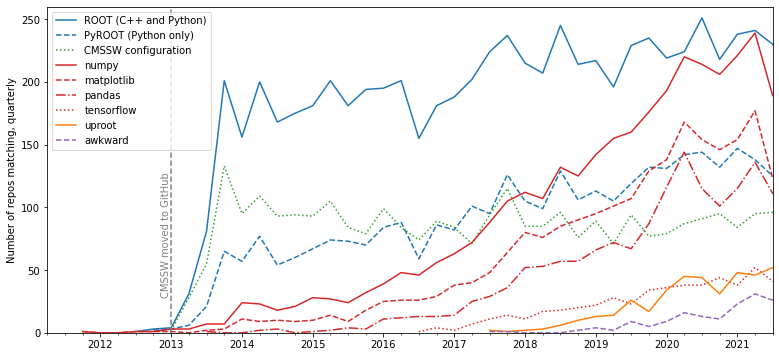

In [66]:
fig, ax = plt.subplots()

comparison.plot(ax=ax,
                style=["-", "--", ":", "-", "--", "-.", ":", "-", "--"],
                color=[c[0], c[0], c[2], c[3], c[3], c[3], c[3], c[1], c[4]], figsize=(13, 6))

ax.axvline(x=pd.to_datetime("2013-01-01"), ls="--", c="gray")
ax.text(pd.to_datetime("2013-01-01"), 0.3, "CMSSW moved to GitHub",
        transform=ax.get_xaxis_transform(), rotation=90, ha="right", va="center", c="gray")

ax.set_xlim(pd.to_datetime("2011-06-01"), pd.to_datetime("2021-09-01"))
ax.set_ylim(0, 260)
ax.set_xlabel("")
ax.set_ylabel("Number of repos matching, quarterly")
ax.get_figure().savefig("PLOTS/gihub-package-fullstudy.svg")
ax.get_figure().savefig("PLOTS/gihub-package-fullstudy.pdf")

In [61]:
comparison2 = pd.DataFrame({
    "total (all CMS user GitHub repos)": matches_df.groupby(["repo", "date"]).any().droplevel(0)["how"].resample(
        "Q", origin=pd.to_datetime("2013-01-01")
    ).sum(),
    "with C++ files": matches_df[is_cpp].groupby(["repo", "date"]).any().droplevel(0)["how"].resample(
        "Q", origin=pd.to_datetime("2013-01-01")
    ).sum(),
    "with Python files (not CMSSW)": matches_df[is_python & ~is_framework].groupby(["repo", "date"]).any().droplevel(0)["how"].resample(
        "Q", origin=pd.to_datetime("2013-01-01")
    ).sum(),
    "with CMSSW configuration": matches_df[is_python & is_framework].groupby(["repo", "date"]).any().droplevel(0)["how"].resample(
        "Q", origin=pd.to_datetime("2013-01-01")
    ).sum(),
    "with Python in Jupyter": matches_df[is_python_jupyter].groupby(["repo", "date"]).any().droplevel(0)["how"].resample(
        "Q", origin=pd.to_datetime("2013-01-01")
    ).sum(),
    "with C++ in Jupyter": matches_df[is_cpp_jupyter].groupby(["repo", "date"]).any().droplevel(0)["how"].resample(
        "Q", origin=pd.to_datetime("2013-01-01")
    ).sum(),
})

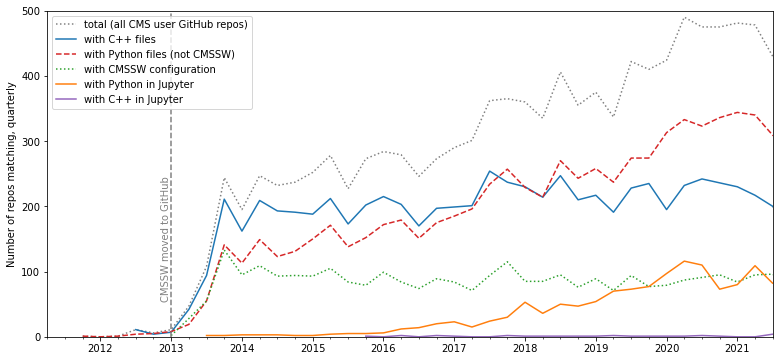

In [67]:
fig, ax = plt.subplots()

comparison2.plot(ax=ax,
                 style=[":", "-", "--", ":", "-", "-"],
                 color=["gray", c[0], c[3], c[2], c[1], c[4]],
                 figsize=(13, 6))

ax.axvline(x=pd.to_datetime("2013-01-01"), ls="--", c="gray")
ax.text(pd.to_datetime("2013-01-01"), 0.3, "CMSSW moved to GitHub",
        transform=ax.get_xaxis_transform(), rotation=90, ha="right", va="center", c="gray")

ax.set_xlim(pd.to_datetime("2011-06-01"), pd.to_datetime("2021-09-01"))
ax.set_ylim(0, 500)
ax.set_xlabel("")
ax.set_ylabel("Number of repos matching, quarterly")
ax.legend(loc="upper left")
ax.get_figure().savefig("PLOTS/gihub-language-fullstudy.svg")
ax.get_figure().savefig("PLOTS/gihub-language-fullstudy.pdf")